<a href="https://colab.research.google.com/github/mateusreisuf/face_encode/blob/master/Copy_of_Untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade tqdm

Requirement already up-to-date: tqdm in /usr/local/lib/python3.6/dist-packages (4.47.0)


In [ ]:
import os 
os.kill(os.getpid(), 9)

In [1]:
!rm -rf sample_data
!git clone https://github.com/pbaylies/stylegan-encoder

Cloning into 'stylegan-encoder'...
remote: Enumerating objects: 483, done.
remote: Total 483 (delta 0), reused 0 (delta 0), pack-reused 483
Receiving objects: 100% (483/483), 12.75 MiB | 4.93 MiB/s, done.
Resolving deltas: 100% (263/263), done.


In [2]:
cd stylegan-encoder

/content/stylegan-encoder


In [30]:
ls

adaptive.py                            metrics/
aligned_images/                        mona_example.jpg
align_images.py                        Play_with_latent_directions.ipynb
cache/                                 pretrained_example.py*
config.py*                             __pycache__/
data/                                  raw_images/
dataset_tool.py*                       README.md*
dnnlib/                                requirements.txt
encode_images.py                       robust_loss/
encoder/                               run_metrics.py*
ffhq_dataset/                          StyleGAN_Encoder_Tutorial.ipynb
generated_images/                      swa.py
generate_figures.py*                   teaser.png
images/                                train_effnet.py
latent_representations/                training/
Learn_direction_in_latent_space.ipynb  train.py*
LICENSE.txt*                           train_resnet.py
masks/                                 videos/


In [3]:
rm -rf aligned_images raw_images

In [4]:
mkdir aligned_images raw_images

Found 4 images in raw_images
['20200627_205056.jpg', 'IMG_20200629_101745.jpg', '\\media\\mat\\EA56DA2656D9F2F5\\.Trash-1000\\files\\b.jpg', 'rsz_20200702_101632.jpg']


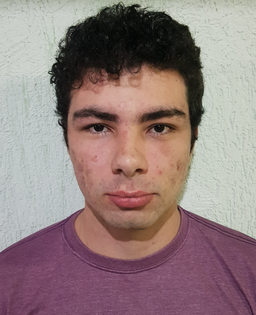

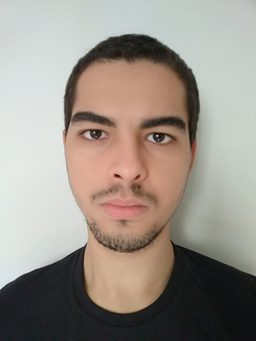

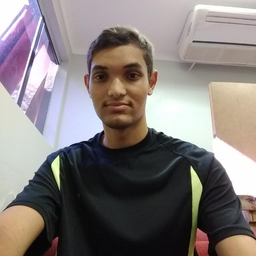

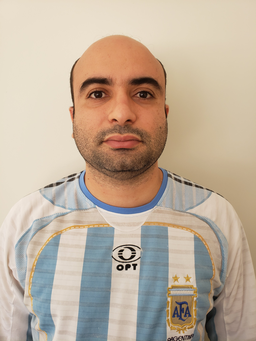

In [7]:
#Colocar imagens na pasta raw_images
from PIL import Image
Image.LOAD_TRUNCATED_IMAGES = True
import os
imgs = sorted(os.listdir('raw_images'))

print("Found %d images in %s" %(len(imgs), 'raw_images'))
if len(imgs) == 0:
  print("Upload images to the \"raw_images\" folder!")
else:
  print(imgs)

for img_path in imgs:
  img = Image.open('raw_images/' + img_path)
  
  w,h = img.size
  rescale_ratio = 256 / min(w,h)
  img = img.resize((int(rescale_ratio*w),int(rescale_ratio*h)), Image.LANCZOS)
  display(img)




In [8]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [10]:
!python align_images.py raw_images/ aligned_images/ --output_size=1024

Using TensorFlow backend.
64045056/64040097 [==============================] - 7s 0us/step
Aligning rsz_20200702_101632.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/rsz_20200702_101632_01.png
Starting face alignment...
Wrote result aligned_images/rsz_20200702_101632_02.png
Aligning \media\mat\EA56DA2656D9F2F5\.Trash-1000\files\b.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/\media\mat\EA56DA2656D9F2F5\.Trash-1000\files\b_01.png
Aligning 20200627_205056.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/20200627_205056_01.png
Aligning IMG_20200629_101745.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/IMG_20200629_101745_01.png


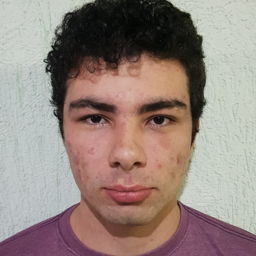

'img 1: 20200627_205056_01.png'

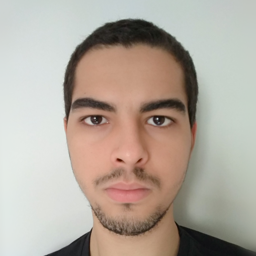

'img 2: IMG_20200629_101745_01.png'

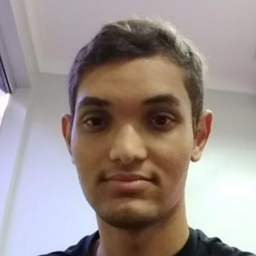

'img 3: \\media\\mat\\EA56DA2656D9F2F5\\.Trash-1000\\files\\b_01.png'

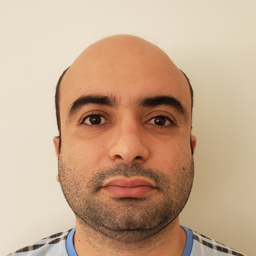

'img 4: rsz_20200702_101632_01.png'

In [12]:
def display_folder_content(folder, res = 256):
  if folder[-1] != '/': folder += '/'
  for i, img_path in enumerate(sorted(os.listdir(folder))):
    if '.png' in img_path:
      display(Image.open(folder+img_path).resize((res,res)), 'img %d: %s' %(i, img_path))
      print('\n')
      
display_folder_content('aligned_images')

In [13]:

!gdown https://drive.google.com/uc?id=1aT59NFy9-bNyXjDuZOTMl0qX0jmZc6Zb
!mkdir data
!mv finetuned_resnet.h5 data
!rm -rf generated_images latent_representations

Downloading...
From: https://drive.google.com/uc?id=1aT59NFy9-bNyXjDuZOTMl0qX0jmZc6Zb
To: /content/stylegan-encoder/finetuned_resnet.h5
330MB [00:06, 42.5MB/s]


In [14]:
print("aligned_images contains %d images ready for encoding!" %len(os.listdir('aligned_images/')))
print("Recommended batch_size for the encode_images process: %d" %min(len(os.listdir('aligned_images/')), 4))

aligned_images contains 5 images ready for encoding!
Recommended batch_size for the encode_images process: 4


In [18]:

!python encode_images.py --optimizer=adam --lr=0.02 --decay_rate=0.95 --decay_steps=6 --use_l1_penalty=0.3 --face_mask=True --iterations=400 --early_stopping=True --early_stopping_threshold=0.05 --average_best_loss=0.5 --use_lpips_loss=0 --use_discriminator_loss=0 --output_video=True aligned_images/ generated_images/ latent_representations/





Using TensorFlow backend.










Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




Instructions for updating:
If using Keras pass *_constraint arguments to layers.

  0% 0/4 [00:00<?, ?it/s]WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:431: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.


Loading mask masks/IMG_20200629_101745_01.png
Loading ResNet Model:

  0% 0/400 [00:00<?, ?it/s]WARNING:tensorflow:From /content/stylegan-encoder/encoder/perceptual_model.py:292: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().

IMG_20200629_101745_01: loss 104.9217; lr 0.0200:   0% 0/400 [00:04<?, ?it/s]
IMG_20200629_101745_01: loss 104.9217; lr 0.0200:   0% 1/400 [00:

In [16]:
!mkdir cache

In [19]:
import dnnlib, pickle
import dnnlib.tflib as tflib
tflib.init_tf()
synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True), minibatch_size=1)

model_dir = 'cache/'
model_path = [model_dir+f for f in os.listdir(model_dir) if 'stylegan-ffhq' in f][0]
print("Loading StyleGAN model from %s..." %model_path)

with dnnlib.util.open_url(model_path) as f:
  generator_network, discriminator_network, averaged_generator_network = pickle.load(f)
  
print("StyleGAN loaded & ready for sampling!")









Loading StyleGAN model from cache/263e666dc20e26dcbfa514733c1d1f81_karras2019stylegan-ffhq-1024x1024.pkl...







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
StyleGAN loaded & ready for sampling!


In [20]:
def generate_images(generator, latent_vector, z = True):
    batch_size = latent_vector.shape[0]
    
    if z: #Start from z: run the full generator network
        return generator.run(latent_vector.reshape((batch_size, 512)), None, randomize_noise=False, **synthesis_kwargs)
    else: #Start from w: skip the mapping network
        return generator.components.synthesis.run(latent_vector.reshape((batch_size, 18, 512)), randomize_noise=False, **synthesis_kwargs)



In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
def plot_imgs(model, rows, columns):
  for i in range(rows):
    f, axarr = plt.subplots(1,columns, figsize = (20,8))
    for j in range(columns):
      img = generate_images(model, np.random.randn(1,512), z = True)[0]
      axarr[j].imshow(img)
      axarr[j].axis('off')
      axarr[j].set_title('Resolution: %s' %str(img.shape))
    plt.show()

In [41]:
# Gera faces
#plot_imgs(averaged_generator_network, 3, 3)

In [24]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


(1024, 1024, 3)


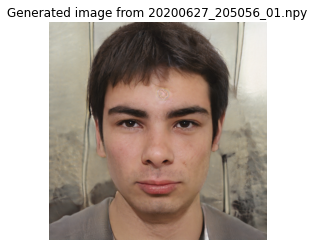

(1024, 1024, 3)


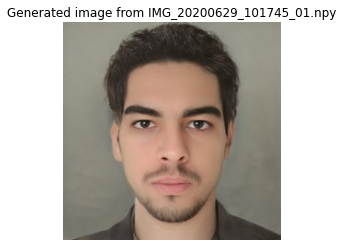

(1024, 1024, 3)


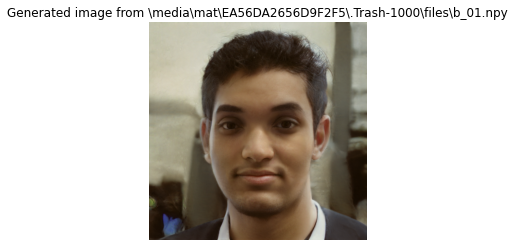

(1024, 1024, 3)


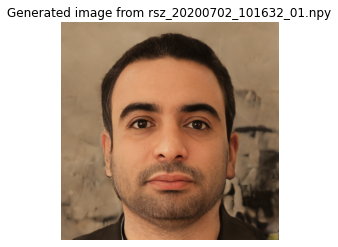

In [42]:


import numpy as np

from PIL import Image

i=0
for f in sorted(os.listdir('latent_representations')):
  w = np.load('latent_representations/' + f).reshape((1,18,-1))
  img = generate_images(averaged_generator_network, w, z = False)[0]
  print(img.shape)
  
  im = Image.fromarray(img)
  im.save('images/'+str(i)+'.png')
  plt.imshow(img)
  plt.axis('off')
  plt.title("Generated image from %s" %f)
  
  plt.show()
  i+=1





In [ ]:
Usar quando quiser reconstruir images a partir dos vetores na pasta latent_representations
'''
!mkdir images
import numpy as np
from PIL import Image
import glob



h=9
a=glob.glob('./latent_representations/*.npy')
for i in range(len(a)):
  w=np.load(a[i]).reshape((1,18,-1))
  img=generate_images(averaged_generator_network,w,z=False)[0]
  im = Image.fromarray(img)
  im.save('./images/'+str(h)+".png")
  plt.imshow(img)
  plt.axis('off')
  plt.title("Generated image from %s" %f)
  plt.show()
  h+=1
'''











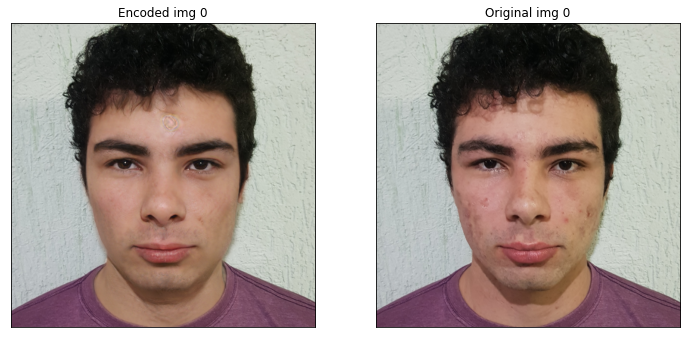

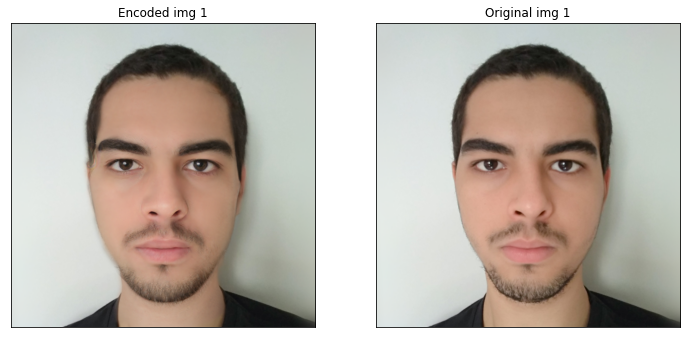

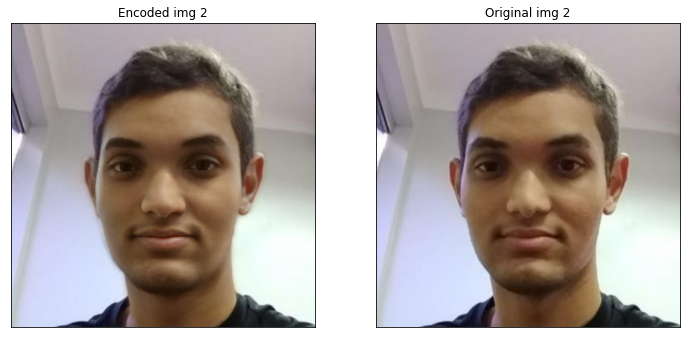

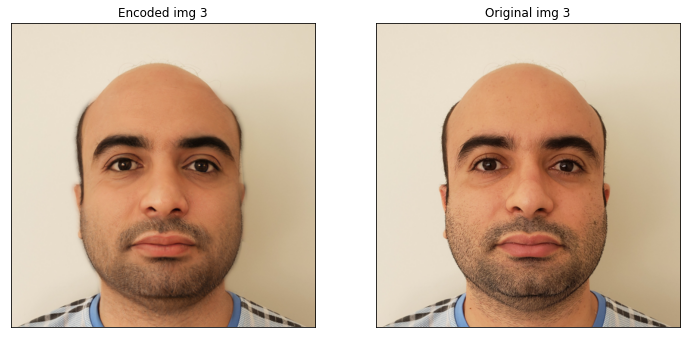

In [40]:
import matplotlib.pyplot as plt

def plot_two_images(img1,img2, img_id, fs = 12):
  f, axarr = plt.subplots(1,2, figsize=(fs,fs))
  axarr[0].imshow(img1)
  axarr[0].title.set_text('Encoded img %d' %img_id)
  axarr[1].imshow(img2)
  axarr[1].title.set_text('Original img %d' %img_id)
  plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
  plt.show()

def display_sbs(folder1, folder2, res = 256):
  if folder1[-1] != '/': folder1 += '/'
  if folder2[-1] != '/': folder2 += '/'
    
  imgs1 = sorted([f for f in os.listdir(folder1) if '.png' in f])
  imgs2 = sorted([f for f in os.listdir(folder2) if '.png' in f])
  if len(imgs1)!=len(imgs2):
    print("Found different amount of images in aligned vs raw image directories. That's not supposed to happen...")
  
  for i in range(len(imgs1)):
    img1 = Image.open(folder1+imgs1[i]).resize((res,res))
    img2 = Image.open(folder2+imgs2[i]).resize((res,res))
    plot_two_images(img1,img2, i)
    print("")
     
display_sbs('generated_images/', 'aligned_images/', res = 512)

In [43]:
good_images = [0,1,2,3]  #mudar o numero referente aos vetores que deseja salvar

In [44]:
import numpy as np
latents = sorted(os.listdir('latent_representations'))

out_file = '/content/output_vectors.npy'

final_w_vectors = []
for img_id in good_images:
  w = np.load('latent_representations/' + latents[img_id])
  final_w_vectors.append(w)

final_w_vectors = np.array(final_w_vectors)
np.save(out_file, final_w_vectors)
print("%d latent vectors of shape %s saved to %s!" %(len(good_images), str(w.shape), out_file))

4 latent vectors of shape (18, 512) saved to /content/output_vectors.npy!
